# Windpowerlib  
https://windpowerlib.readthedocs.io/en/stable/

In [1]:
import windpowerlib
df = windpowerlib.get_turbine_types()

       manufacturer  turbine_type  has_power_curve  has_cp_curve
0       Adwen/Areva    AD116/5000             True         False
1           Enercon    E-101/3050             True          True
2           Enercon    E-101/3500             True          True
3           Enercon    E-115/3000             True          True
4           Enercon    E-115/3200             True          True
5           Enercon    E-126/4200             True          True
6           Enercon    E-126/7500             True         False
7           Enercon    E-126/7580             True         False
8           Enercon    E-141/4200             True          True
9           Enercon      E-53/800             True          True
10          Enercon     E-70/2000             True         False
11          Enercon     E-70/2300             True          True
12          Enercon     E-82/2000             True          True
13          Enercon     E-82/2300             True          True
14          Enercon     E

In [2]:
import pandas as pd

file="./data/dwd_wind_data_2015.csv"
weather = pd.read_csv(file, index_col=0, header=[0, 1])
weather.index = pd.to_datetime(weather.index)
weather

,wind_speed,pressure,temperature,roughness_length
,10,0,2,0
time,,,,
2015-01-01 00:00:00,1.65,102455.0,273.60,0.15
2015-01-01 00:15:00,2.00,102450.0,274.15,0.15
2015-01-01 00:30:00,2.10,102435.0,274.50,0.15
2015-01-01 00:45:00,1.40,102440.0,274.45,0.15
2015-01-01 01:00:00,1.20,102460.0,274.35,0.15
...,...,...,...,...
2015-12-31 22:45:00,4.30,101250.0,278.25,0.15
2015-12-31 23:00:00,4.20,101245.0,278.35,0.15


In [4]:
from windpowerlib.wind_turbine import WindTurbine

enercon_e126 = {
        'turbine_type': 'E-126/4200',  # turbine type as in oedb turbine library
        'hub_height': 135  # in m
    }
# initialize WindTurbine object
e126 = WindTurbine(**enercon_e126)

In [5]:
# own specifications for ModelChain setup
modelchain_data = {
    'wind_speed_model': 'logarithmic',      # 'logarithmic' (default),
                                            # 'hellman' or
                                            # 'interpolation_extrapolation'
    'density_model': 'ideal_gas',           # 'barometric' (default), 'ideal_gas'
                                            #  or 'interpolation_extrapolation'
    'temperature_model': 'linear_gradient', # 'linear_gradient' (def.) or
                                            # 'interpolation_extrapolation'
    'power_output_model': 'power_curve',    # 'power_curve' (default) or
                                            # 'power_coefficient_curve'
    'density_correction': True,             # False (default) or True
    'obstacle_height': 0,                   # default: 0
    'hellman_exp': None}                    # None (default) or None



In [6]:
from windpowerlib.modelchain import ModelChain
# initialize ModelChain with own specifications and use run_model method to
# calculate power output
modelchain = ModelChain(e126, **modelchain_data).run_model(weather)

In [7]:
modelchain.__dict__.keys()

dict_keys(['power_plant', 'obstacle_height', 'wind_speed_model', 'temperature_model', 'density_model', 'power_output_model', 'density_correction', 'hellman_exp', 'power_output'])

<AxesSubplot:xlabel='time'>

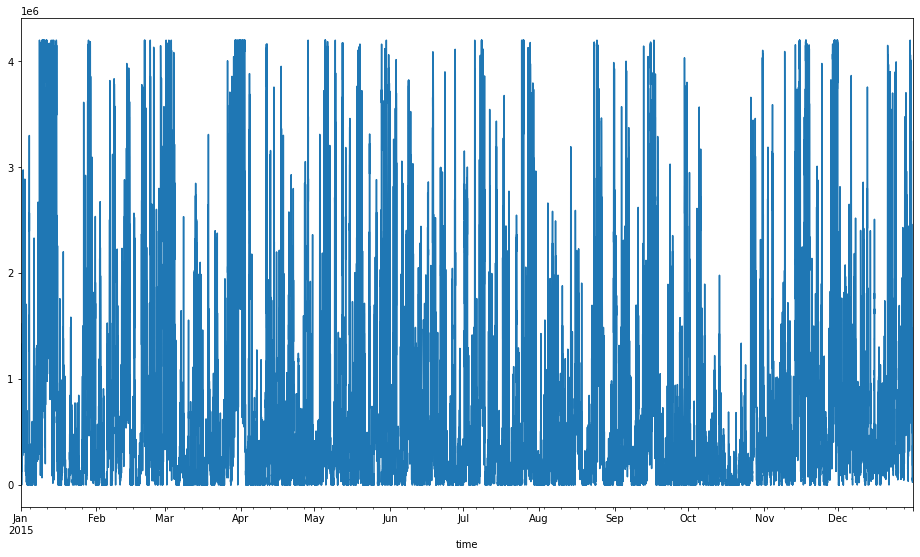

In [8]:
modelchain.power_output.plot(figsize=(16,9))